In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = 'data/madelon_train.data'
train_labels = 'data/madelon_train.labels'
valid_data = 'data/madelon_valid.data'
valid_labels = 'data/madelon_valid.labels.txt'

In [40]:
df_train = pd.read_csv(train_data, sep = ' ', header = None)
df_valid = pd.read_csv(valid_data, sep = ' ', header = None)
y_train = pd.read_csv(train_labels, header = None)
y_valid = pd.read_csv(valid_labels, header = None)

In [41]:
df = pd.concat([df_train, df_valid])
df = df.drop(500, axis = 1)
df.shape

(2600, 500)

In [42]:
y = pd.concat([y_train, y_valid])
y.shape

(2600, 1)

In [43]:
df.to_csv('data/manelon_complete_training.csv', index = False)
y.to_csv('data/manelon_complete_labels.csv', index = False, header = ['target'])

In [44]:
df.columns = [str(i) for i in df.columns]

In [45]:
len(df.columns)

500

In [46]:
df['target'] = y

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [54]:
df_scale.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '491', '492', '493', '494', '495', '496', '497', '498', '499',
       'target'],
      dtype='object', length=501)

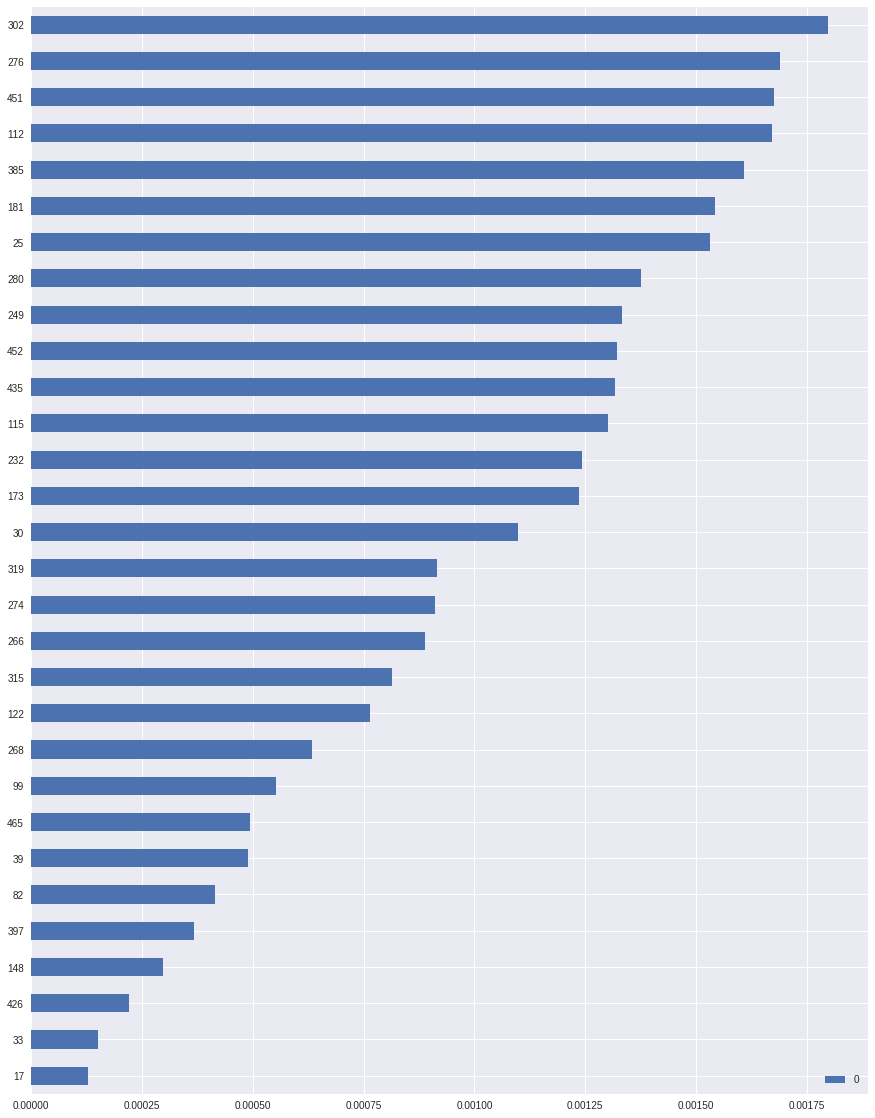

In [59]:
# why does this return bars in a different order?
pd.DataFrame(abs(df.drop('target').corrwith(df['target']))).sort_values(0).head(30).plot.barh(figsize=(15,20))
plt.show()

In [32]:
df_means = df.groupby('target')


In [35]:
df_means.agg([np.mean, np.count_nonzero])

0                         1                         2  \
              mean count_nonzero        mean count_nonzero        mean   
target                                                                   
-1      481.707692          1300  483.736923          1300  509.510000   
 1      481.776923          1300  483.365385          1300  509.167692   

                               3                         4                \
       count_nonzero        mean count_nonzero        mean count_nonzero   
target                                                                     
-1              1300  483.394615          1300  499.176923          1300   
 1              1300  483.334615          1300  502.674615          1300   

            ...              495                       496                \
            ...             mean count_nonzero        mean count_nonzero   
target      ...                                                            
-1          ...       510.950000          1300  478.489231          1300   
 1          ...       510.513077          1300  477.813077          1300   

               497                       498                       499  \
              mean count_nonzero        mean count_nonzero        mean   
target                                                                   
-1      482.659231          1300  507.799231          1300  490.415385   
 1      483.655385          1300  509.073846          1300  490.760769   

                      
       count_nonzero  
target                
-1              1300  
 1              1300  

[2 rows x 1000 columns]